<a href="https://colab.research.google.com/github/SeYoungMir/TIL/blob/master/%5B2_24%5DDLimgmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

텐서플로가 제공하는 데이터셋 확인

MNIST 필기 숫자 데이터셋

CIFAR-10 자연영상 데이터셋

In [1]:
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
plt.figure(figsize=(24,3))
plt.suptitle('MNIST',fontsize=30)

Text(0.5, 0.98, 'MNIST')

<Figure size 1728x216 with 0 Axes>

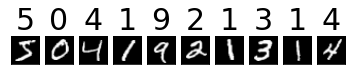

In [3]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title(str(y_train[i]),fontsize=30)


In [4]:
(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
class_names=['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(24,3))
plt.suptitle('CIFAR-10',fontsize=30)

Text(0.5, 0.98, 'CIFAR-10')

<Figure size 1728x216 with 0 Axes>

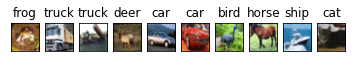

In [6]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[y_train[i,0]],fontsize=12)

필기 숫자 인식

다층 퍼셉트론으로 MNIST 인식하기(SGD 옵티마이저)

In [7]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [8]:
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()

In [9]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [10]:
mlp=Sequential()
mlp.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp.add(Dense(units=10,activation='softmax'))


In [11]:
mlp.compile(loss='MSE',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [12]:
mlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)


Epoch 1/50
469/469 - 4s - loss: 0.0876 - accuracy: 0.2104 - val_loss: 0.0842 - val_accuracy: 0.3102 - 4s/epoch - 8ms/step
Epoch 2/50
469/469 - 2s - loss: 0.0808 - accuracy: 0.3765 - val_loss: 0.0770 - val_accuracy: 0.4368 - 2s/epoch - 5ms/step
Epoch 3/50
469/469 - 3s - loss: 0.0737 - accuracy: 0.4850 - val_loss: 0.0698 - val_accuracy: 0.5347 - 3s/epoch - 6ms/step
Epoch 4/50
469/469 - 3s - loss: 0.0667 - accuracy: 0.5673 - val_loss: 0.0629 - val_accuracy: 0.6114 - 3s/epoch - 5ms/step
Epoch 5/50
469/469 - 3s - loss: 0.0603 - accuracy: 0.6401 - val_loss: 0.0568 - val_accuracy: 0.6806 - 3s/epoch - 6ms/step
Epoch 6/50
469/469 - 3s - loss: 0.0547 - accuracy: 0.6944 - val_loss: 0.0514 - val_accuracy: 0.7286 - 3s/epoch - 7ms/step
Epoch 7/50
469/469 - 3s - loss: 0.0499 - accuracy: 0.7312 - val_loss: 0.0470 - val_accuracy: 0.7585 - 3s/epoch - 5ms/step
Epoch 8/50
469/469 - 2s - loss: 0.0459 - accuracy: 0.7587 - val_loss: 0.0432 - val_accuracy: 0.7828 - 2s/epoch - 5ms/step
Epoch 9/50
469/469 - 3s 

In [13]:
res=mlp.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)


정확률= 89.60999846458435


Adam 옵티마이저를 사용하여 성능 향상

In [14]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [15]:
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()

In [16]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [17]:
mlp=Sequential()
mlp.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp.add(Dense(units=10,activation='softmax'))


In [18]:
mlp.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])


In [19]:
mlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)


Epoch 1/50
469/469 - 4s - loss: 0.0150 - accuracy: 0.9008 - val_loss: 0.0107 - val_accuracy: 0.9309 - 4s/epoch - 9ms/step
Epoch 2/50
469/469 - 3s - loss: 0.0090 - accuracy: 0.9423 - val_loss: 0.0073 - val_accuracy: 0.9529 - 3s/epoch - 6ms/step
Epoch 3/50
469/469 - 3s - loss: 0.0066 - accuracy: 0.9586 - val_loss: 0.0062 - val_accuracy: 0.9587 - 3s/epoch - 7ms/step
Epoch 4/50
469/469 - 4s - loss: 0.0052 - accuracy: 0.9677 - val_loss: 0.0051 - val_accuracy: 0.9678 - 4s/epoch - 8ms/step
Epoch 5/50
469/469 - 3s - loss: 0.0042 - accuracy: 0.9745 - val_loss: 0.0049 - val_accuracy: 0.9674 - 3s/epoch - 7ms/step
Epoch 6/50
469/469 - 3s - loss: 0.0035 - accuracy: 0.9790 - val_loss: 0.0043 - val_accuracy: 0.9720 - 3s/epoch - 6ms/step
Epoch 7/50
469/469 - 3s - loss: 0.0030 - accuracy: 0.9821 - val_loss: 0.0038 - val_accuracy: 0.9748 - 3s/epoch - 7ms/step
Epoch 8/50
469/469 - 4s - loss: 0.0025 - accuracy: 0.9859 - val_loss: 0.0036 - val_accuracy: 0.9772 - 4s/epoch - 8ms/step
Epoch 9/50
469/469 - 4s 

In [20]:
res=mlp.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

정확률= 98.1000006198883


성능 시각화

SGD와 Adam 성능을 그래프로 비교

In [21]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [22]:
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()

In [23]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)


In [24]:
mlp_sgd=Sequential()
mlp_sgd.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_sgd.add(Dense(units=10,activation='softmax'))

In [25]:
mlp_sgd.compile(loss='MSE',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [26]:
hist_sgd=mlp_sgd.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)


Epoch 1/50
469/469 - 3s - loss: 0.0871 - accuracy: 0.2304 - val_loss: 0.0832 - val_accuracy: 0.3054 - 3s/epoch - 6ms/step
Epoch 2/50
469/469 - 3s - loss: 0.0800 - accuracy: 0.3521 - val_loss: 0.0765 - val_accuracy: 0.4121 - 3s/epoch - 6ms/step
Epoch 3/50
469/469 - 3s - loss: 0.0736 - accuracy: 0.4578 - val_loss: 0.0701 - val_accuracy: 0.5068 - 3s/epoch - 7ms/step
Epoch 4/50
469/469 - 3s - loss: 0.0675 - accuracy: 0.5335 - val_loss: 0.0639 - val_accuracy: 0.5734 - 3s/epoch - 6ms/step
Epoch 5/50
469/469 - 3s - loss: 0.0617 - accuracy: 0.6037 - val_loss: 0.0581 - val_accuracy: 0.6496 - 3s/epoch - 6ms/step
Epoch 6/50
469/469 - 3s - loss: 0.0562 - accuracy: 0.6716 - val_loss: 0.0528 - val_accuracy: 0.7076 - 3s/epoch - 6ms/step
Epoch 7/50
469/469 - 3s - loss: 0.0514 - accuracy: 0.7171 - val_loss: 0.0481 - val_accuracy: 0.7464 - 3s/epoch - 6ms/step
Epoch 8/50
469/469 - 3s - loss: 0.0472 - accuracy: 0.7492 - val_loss: 0.0443 - val_accuracy: 0.7767 - 3s/epoch - 6ms/step
Epoch 9/50
469/469 - 3s 

In [27]:
print('SGD 정확률=',mlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)

SGD 정확률= 89.67999815940857


In [28]:
mlp_adam=Sequential()
mlp_adam.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_adam.add(Dense(units=10,activation='softmax'))

In [29]:
mlp_adam.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [30]:
hist_adam=mlp_adam.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)


Epoch 1/50
469/469 - 4s - loss: 0.0146 - accuracy: 0.9043 - val_loss: 0.0107 - val_accuracy: 0.9301 - 4s/epoch - 8ms/step
Epoch 2/50
469/469 - 4s - loss: 0.0089 - accuracy: 0.9434 - val_loss: 0.0081 - val_accuracy: 0.9476 - 4s/epoch - 8ms/step
Epoch 3/50
469/469 - 3s - loss: 0.0065 - accuracy: 0.9592 - val_loss: 0.0061 - val_accuracy: 0.9606 - 3s/epoch - 7ms/step
Epoch 4/50
469/469 - 3s - loss: 0.0050 - accuracy: 0.9690 - val_loss: 0.0050 - val_accuracy: 0.9670 - 3s/epoch - 6ms/step
Epoch 5/50
469/469 - 3s - loss: 0.0040 - accuracy: 0.9758 - val_loss: 0.0043 - val_accuracy: 0.9735 - 3s/epoch - 7ms/step
Epoch 6/50
469/469 - 4s - loss: 0.0034 - accuracy: 0.9797 - val_loss: 0.0043 - val_accuracy: 0.9727 - 4s/epoch - 8ms/step
Epoch 7/50
469/469 - 3s - loss: 0.0028 - accuracy: 0.9834 - val_loss: 0.0038 - val_accuracy: 0.9746 - 3s/epoch - 6ms/step
Epoch 8/50
469/469 - 3s - loss: 0.0023 - accuracy: 0.9863 - val_loss: 0.0042 - val_accuracy: 0.9735 - 3s/epoch - 7ms/step
Epoch 9/50
469/469 - 4s 

In [31]:
print('Adam 정확률=',mlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)

Adam 정확률= 98.22999835014343


In [32]:
import matplotlib.pyplot as plt

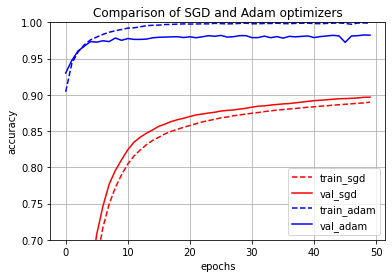

In [33]:
plt.plot(hist_sgd.history['accuracy'],'r--')
plt.plot(hist_sgd.history['val_accuracy'],'r')
plt.plot(hist_adam.history['accuracy'],'b--')
plt.plot(hist_adam.history['val_accuracy'],'b')
plt.title('Comparison of SGD and Adam optimizers')
plt.ylim((0.7,1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd','val_sgd','train_adam','val_adam'])
plt.grid()
plt.show()

하이퍼 매개변수 다루기

깊은 다층 퍼셉트론으로 MNIST 인식

In [34]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [35]:
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()

In [36]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [37]:
dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(784,)))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=10,activation='softmax'))


In [38]:
dmlp.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])


In [39]:
hist=dmlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)

Epoch 1/50
469/469 - 12s - loss: 0.3989 - accuracy: 0.8988 - val_loss: 0.1752 - val_accuracy: 0.9475 - 12s/epoch - 25ms/step
Epoch 2/50
469/469 - 11s - loss: 0.1433 - accuracy: 0.9590 - val_loss: 0.1272 - val_accuracy: 0.9621 - 11s/epoch - 24ms/step
Epoch 3/50
469/469 - 11s - loss: 0.0976 - accuracy: 0.9714 - val_loss: 0.0979 - val_accuracy: 0.9700 - 11s/epoch - 23ms/step
Epoch 4/50
469/469 - 11s - loss: 0.0698 - accuracy: 0.9797 - val_loss: 0.0792 - val_accuracy: 0.9751 - 11s/epoch - 23ms/step
Epoch 5/50
469/469 - 11s - loss: 0.0524 - accuracy: 0.9849 - val_loss: 0.0743 - val_accuracy: 0.9775 - 11s/epoch - 24ms/step
Epoch 6/50
469/469 - 11s - loss: 0.0396 - accuracy: 0.9886 - val_loss: 0.0675 - val_accuracy: 0.9794 - 11s/epoch - 24ms/step
Epoch 7/50
469/469 - 11s - loss: 0.0305 - accuracy: 0.9914 - val_loss: 0.0637 - val_accuracy: 0.9809 - 11s/epoch - 24ms/step
Epoch 8/50
469/469 - 11s - loss: 0.0221 - accuracy: 0.9943 - val_loss: 0.0615 - val_accuracy: 0.9811 - 11s/epoch - 23ms/step


In [40]:
print('정확률=', dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

정확률= 97.69999980926514


In [41]:
dmlp.save('dmlp_trained.h5')


In [42]:
import matplotlib.pyplot as plt

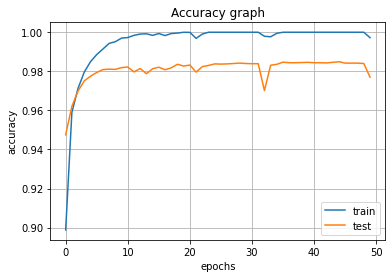

In [43]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

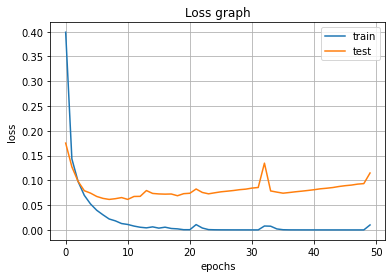

In [44]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()

자연 영상 인식

깊은 다층 퍼셉트론으로 CIFAR-10 인식하기


In [45]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [46]:
(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()


In [47]:
x_train=x_train.reshape(50000,3072)
x_test=x_test.reshape(10000,3072)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)


In [48]:
dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(3072,)))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=10,activation='softmax'))

In [49]:
dmlp.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [50]:
hist=dmlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)


Epoch 1/50
391/391 - 21s - loss: 1.8223 - accuracy: 0.3492 - val_loss: 1.6622 - val_accuracy: 0.4157 - 21s/epoch - 54ms/step
Epoch 2/50
391/391 - 20s - loss: 1.6268 - accuracy: 0.4209 - val_loss: 1.5552 - val_accuracy: 0.4525 - 20s/epoch - 51ms/step
Epoch 3/50
391/391 - 20s - loss: 1.5369 - accuracy: 0.4530 - val_loss: 1.5508 - val_accuracy: 0.4565 - 20s/epoch - 50ms/step
Epoch 4/50
391/391 - 19s - loss: 1.4734 - accuracy: 0.4781 - val_loss: 1.4690 - val_accuracy: 0.4787 - 19s/epoch - 49ms/step
Epoch 5/50
391/391 - 20s - loss: 1.4256 - accuracy: 0.4948 - val_loss: 1.4351 - val_accuracy: 0.4884 - 20s/epoch - 51ms/step
Epoch 6/50
391/391 - 20s - loss: 1.3792 - accuracy: 0.5124 - val_loss: 1.4128 - val_accuracy: 0.4980 - 20s/epoch - 50ms/step
Epoch 7/50
391/391 - 20s - loss: 1.3349 - accuracy: 0.5271 - val_loss: 1.3738 - val_accuracy: 0.5150 - 20s/epoch - 52ms/step
Epoch 8/50
391/391 - 20s - loss: 1.3027 - accuracy: 0.5387 - val_loss: 1.4040 - val_accuracy: 0.5009 - 20s/epoch - 50ms/step


In [51]:
print('정확률=', dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

정확률= 55.08999824523926


In [52]:
# dmlp.save('dmlp_trained.h5')

In [53]:
import matplotlib.pyplot as plt

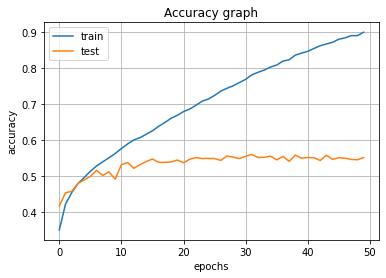

In [54]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()


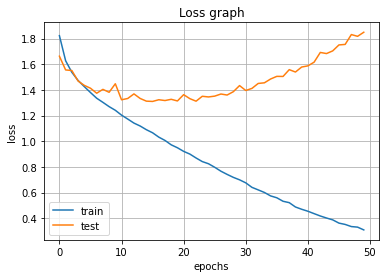

In [55]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()
